## Use Case Pre-processing - Fehlwerte ersetzen & Pre-Processing Pipelines

In [32]:
# imports
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import plotly.express as px
import random

### Einlesen des Datasets

In [33]:
mpg = sns.load_dataset("mpg")

In [34]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Identifizieren der Fehlwerte

<Axes: >

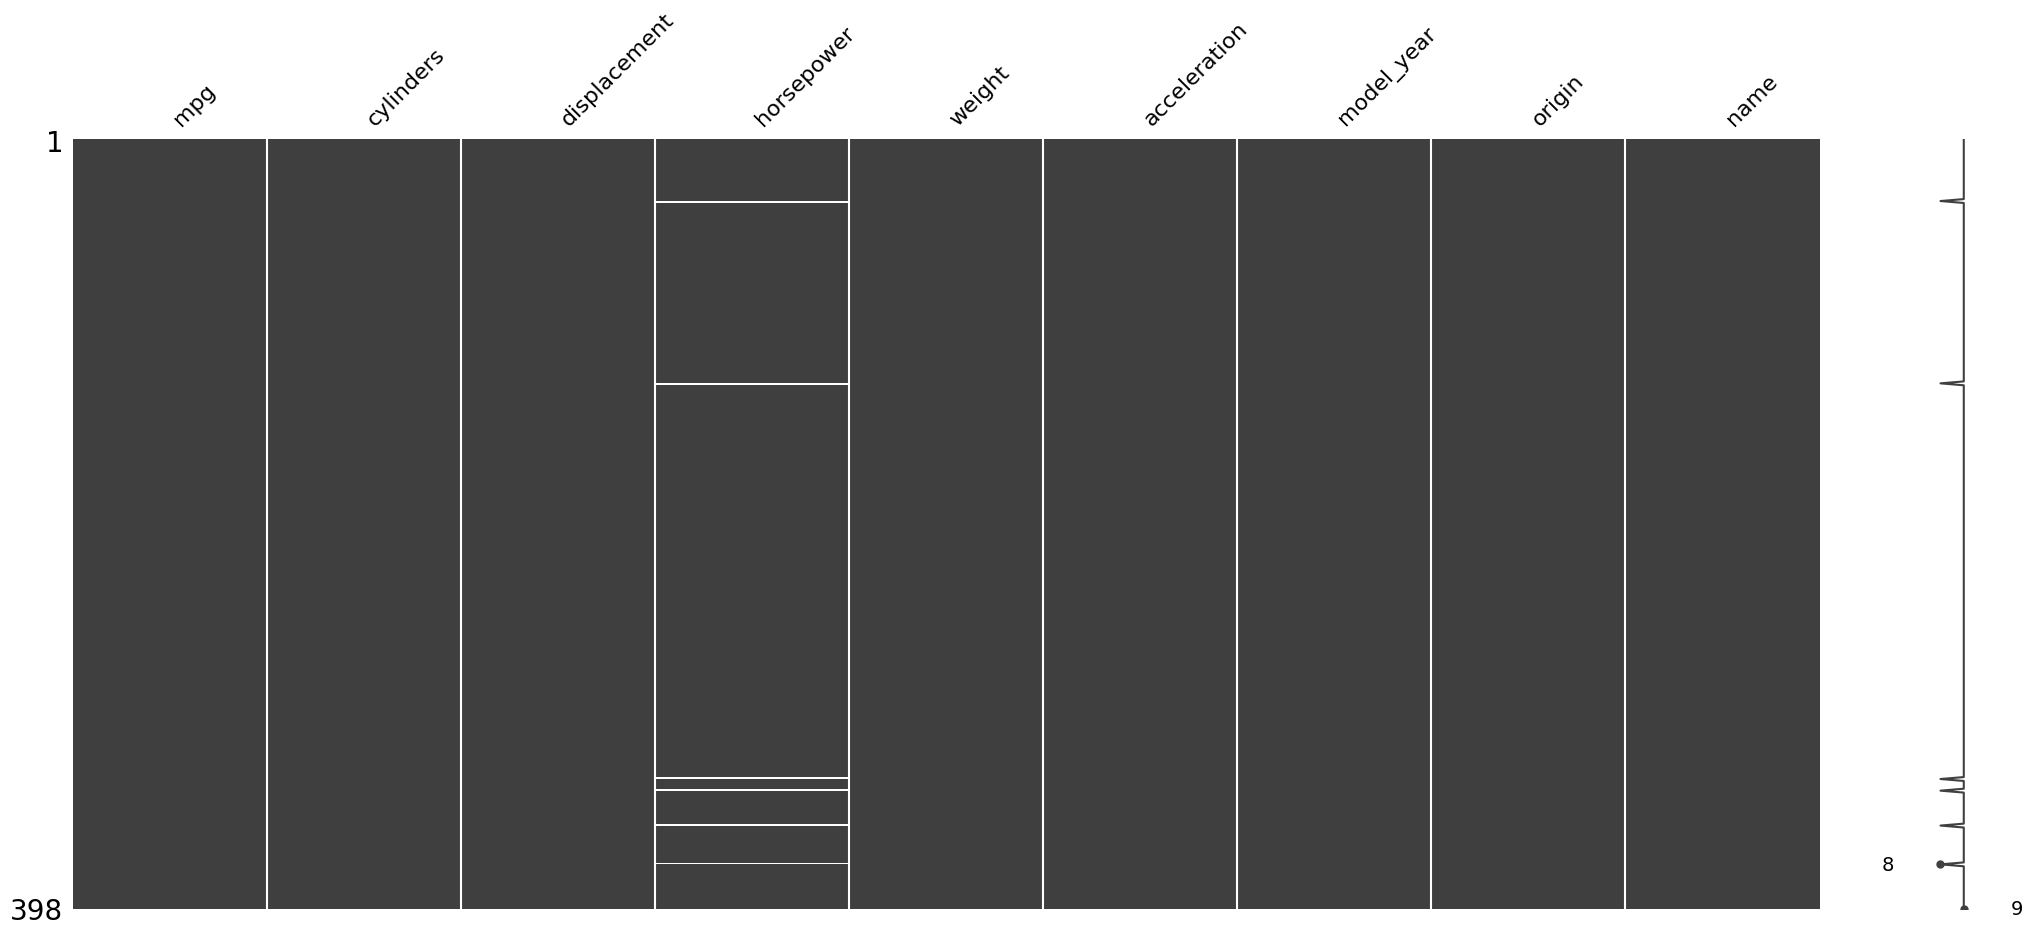

In [35]:
msno.matrix(mpg) # Es fehlen anscheinend Werte in der Spalte horsepower

In [36]:
mpg.loc[mpg.horsepower.isna()] # Alle Fehlwerte ausgeben

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


### Fehlwerte ersetzen

In [37]:
# 1. Methode = Deletion --> nicht empfohlen
# 2. Methode = Imputation
# 3. Methode = ML-Modell anhand vorhandener Features

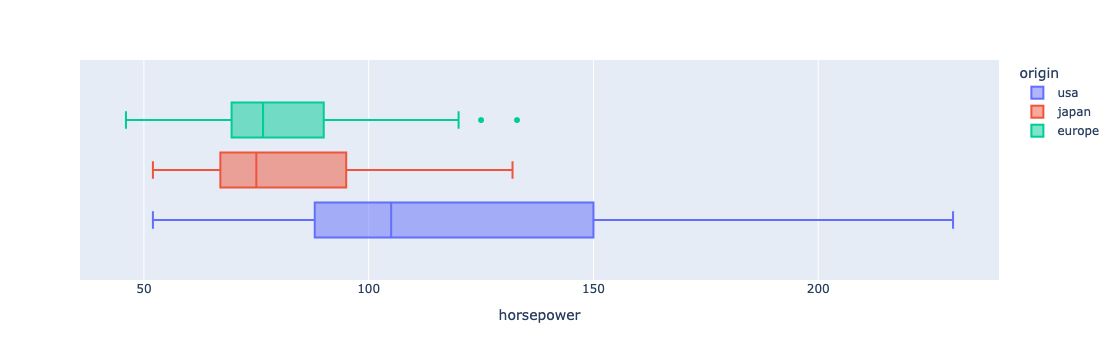

In [38]:
px.box(mpg, x='horsepower', color='origin') # japan und europe ziemlich ähnlich aber usa deutlicher Unterschied --> Mittelwert keine gute Idee

In [39]:
#Imputation mit dem Mittelwert ohne fillna-Methode
mpg.loc[mpg.horsepower.isna(),'horsepower'] = mpg.horsepower.mean()

In [40]:
#Imputation mit dem Mittelwert gruppiert nach der Klasse --> bessere Methode, da Autos je nach Origin unterschiedliche horsepower haben
mpg.horsepower = mpg.horsepower.fillna(mpg.groupby('origin')['horsepower'].transform('mean'))

In [41]:
## Erneutes einlesen des Datasets
mpg = pd.read_csv('../Datasets/mpg.csv')
#Fehlwerte generieren
mask = random.sample(range(1, len(mpg)), 10)
mpg.loc[mask, "weight"] = np.nan

### Simple Imputer

In [42]:
# imports
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

weight = mpg[['weight']].copy() #erstellt eine Kopie des mpg-Datasets

df_impute = imputer.fit_transform(weight)

### Standard Scaler

In [43]:
# imports
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

weight = mpg[['weight']].copy() #erstellt eine Kopie des mpg-Datasets

df_std = scaler.fit_transform(weight)

### Machine Learning Pipeline mit Pre-Processing steps Klassifikation

In [44]:
## Neu laden des Datasets
mpg = sns.load_dataset("mpg")

In [45]:
# Auswahl des Feature-Raums
X = mpg.iloc[:,0:6]

In [46]:
# Auswahl des Targets
y = mpg.origin

In [50]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
pipeline = make_pipeline(
    SimpleImputer(), #Imputation
    StandardScaler(), #Normalisierung
    DecisionTreeClassifier(max_depth=10)
)

In [53]:
pipeline.named_steps

{'simpleimputer': SimpleImputer(),
 'standardscaler': StandardScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=10)}

In [54]:
pipeline = pipeline.fit(X_train,y_train)

In [55]:
pipeline.score(X_test,y_test) #--> Accuracy

0.8625

In [56]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [57]:
pipeline.predict([[18.0,8,307.0,None, 3504,12.0]]) # --> auch wenn horsepower bei Testdaten fehlt wird Wert durch SimpleImputer ersetzt

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but SimpleImputer was fitted with feature names



array(['usa'], dtype=object)

### Machine Learning Pipeline mit Pre-Processing steps Regression

In [58]:
df = pd.read_csv("../Datasets/sales_all.csv")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1923 non-null   object 
 1   WeekdayNo          1923 non-null   int64  
 2   Weekday            1923 non-null   object 
 3   HolidayFlag        1923 non-null   bool   
 4   SchoolHolidayFlag  1923 non-null   bool   
 5   Sales              1923 non-null   float64
dtypes: bool(2), float64(1), int64(1), object(2)
memory usage: 64.0+ KB


In [60]:
### Encoding durch Pandas
pd.get_dummies(df) ##Nur kategorische Werte werden umgeformt

,WeekdayNo,HolidayFlag,SchoolHolidayFlag,Sales,date_2012-01-01,date_2012-01-02,date_2012-01-03,date_2012-01-04,date_2012-01-05,date_2012-01-06,...,date_2017-04-04,date_2017-04-05,date_2017-04-06,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thur,Weekday_Tue,Weekday_Wed
0,6,True,True,117.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0,False,True,106.0,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1,False,True,82.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2,False,True,70.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,False,True,84.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,6,False,False,107.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1919,0,False,False,113.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1920,1,False,False,87.0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1921,2,False,False,69.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [61]:
y = df.Sales
X = df.iloc[:,:-1]

In [62]:
X

,date,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag
0,2012-01-01,6,Sun,True,True
1,2012-01-02,0,Mon,False,True
2,2012-01-03,1,Tue,False,True
3,2012-01-04,2,Wed,False,True
4,2012-01-05,3,Thur,False,True
...,...,...,...,...,...
1918,2017-04-02,6,Sun,False,False
1919,2017-04-03,0,Mon,False,False
1920,2017-04-04,1,Tue,False,False
1921,2017-04-05,2,Wed,False,False


In [63]:
X['year'] = X['date'].astype("datetime64[ns]").dt.year
X['month'] = X['date'].astype("datetime64[ns]").dt.month
X['day'] = X['date'].astype("datetime64[ns]").dt.day

In [64]:
del(X['date'])

In [65]:
X

,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag,year,month,day
0,6,Sun,True,True,2012,1,1
1,0,Mon,False,True,2012,1,2
2,1,Tue,False,True,2012,1,3
3,2,Wed,False,True,2012,1,4
4,3,Thur,False,True,2012,1,5
...,...,...,...,...,...,...,...
1918,6,Sun,False,False,2017,4,2
1919,0,Mon,False,False,2017,4,3
1920,1,Tue,False,False,2017,4,4
1921,2,Wed,False,False,2017,4,5


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [67]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    OneHotEncoder(),
    StandardScaler(with_mean=False),
    LinearRegression()
)

In [68]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [69]:
pipeline.score(X_test,y_test)

0.9550013296455304

In [70]:
pipeline.predict([[6,"Sun",True,True,2012,1,1]]) ## Auch bei der Predcition wird ML-Pipeline angewandt

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([115.10593908])

### Vorschau PCA

In [71]:
from sklearn.decomposition import PCA
import seaborn as sns

iris = sns.load_dataset("iris")

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [72]:
pca = PCA(n_components=2)
pca.fit_transform(iris.iloc[:,:-1])

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [73]:
result = pca.fit_transform(iris.iloc[:,:-1])

In [74]:
import plotly.express as px

In [75]:
iris["pca1"] = result[:,0]
iris["pca2"] = result[:,1]

In [78]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pca1,pca2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


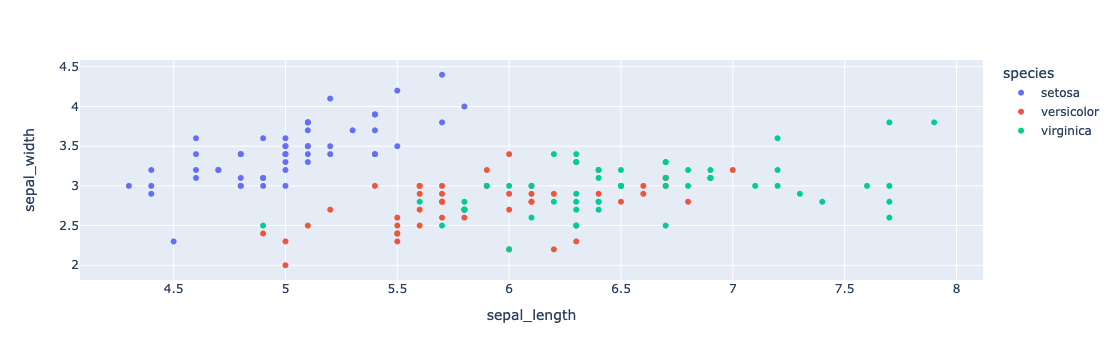

In [88]:
px.scatter(iris, x="sepal_length", y="sepal_width", color="species")

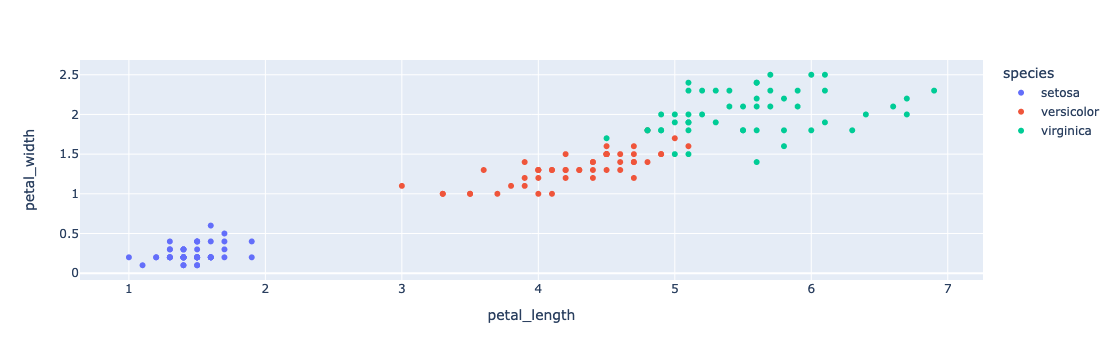

In [80]:
px.scatter(iris, x="petal_length", y="petal_width", color="species")

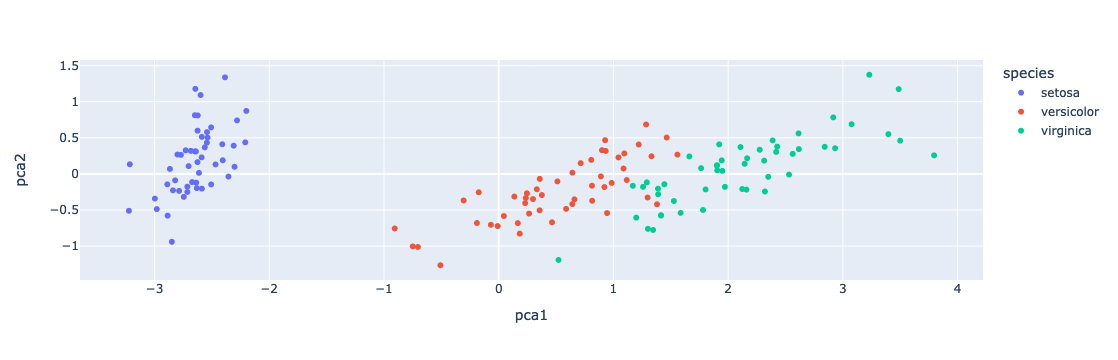

In [76]:
px.scatter(iris,x="pca1",y="pca2",color="species")

In [77]:
## Vorteile: Dimensionsreduktion --> weniger Rechenzeit, Visualisierung großer Dimensionen möglich
## Nachteil: Informationsverlust (je nach Dataset höher oder niedriger)